# Import Modules

In [26]:
import h2o
import pandas
import random
from PIL import Image

In [27]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [28]:
project_path = "/gtc-2017"

# Connect or Start H2O

In [29]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 hour 31 mins
H2O cluster version:,3.11.0.230
H2O cluster version age:,15 hours and 17 minutes
H2O cluster name:,root
H2O cluster total nodes:,1
H2O cluster free memory:,25.75 Gb
H2O cluster total cores:,20
H2O cluster allowed cores:,20
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


# Import Data

Import data into H2O.

In [30]:
mnist_training = h2o.import_file(project_path+"/data/mnist-training.csv")
mnist_testing = h2o.import_file(project_path+"/data/mnist-testing.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


Change the "label" column to a factor (i.e. categorical feature).

In [31]:
mnist_training["label"] = mnist_training["label"].asfactor()
mnist_testing["label"] = mnist_testing["label"].asfactor()

# Explore Data

In [32]:
mnist_training.head()

uri,label
/gtc-2017/data/mnist_png/training/6/6453.png,6
/gtc-2017/data/mnist_png/training/6/13970.png,6
/gtc-2017/data/mnist_png/training/6/21967.png,6
/gtc-2017/data/mnist_png/training/6/11277.png,6
/gtc-2017/data/mnist_png/training/6/27350.png,6
/gtc-2017/data/mnist_png/training/6/32119.png,6
/gtc-2017/data/mnist_png/training/6/44201.png,6
/gtc-2017/data/mnist_png/training/6/58770.png,6
/gtc-2017/data/mnist_png/training/6/39440.png,6
/gtc-2017/data/mnist_png/training/6/41988.png,6


Let's view a sample fo the images.

In [33]:
pd_mnist_training = mnist_training.as_data_frame()
list_image_uris = pd_mnist_training["uri"].tolist()

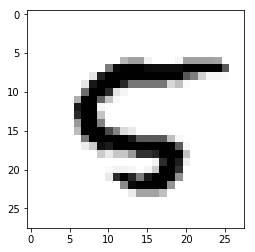

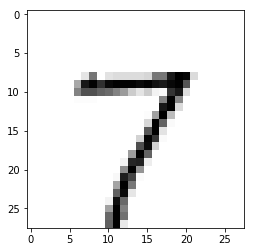

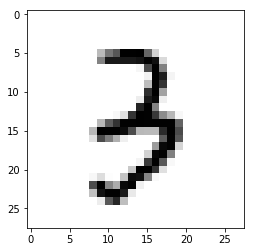

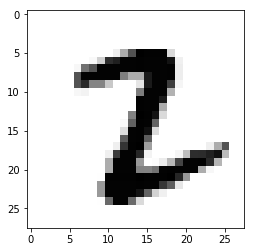

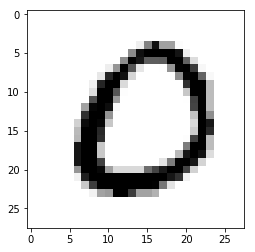

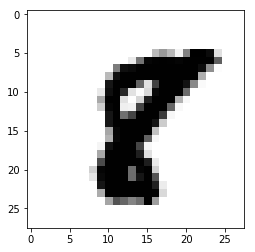

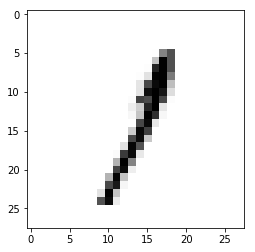

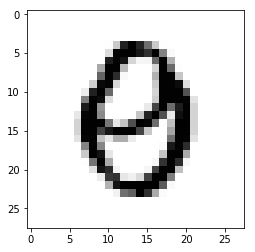

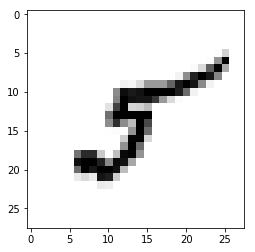

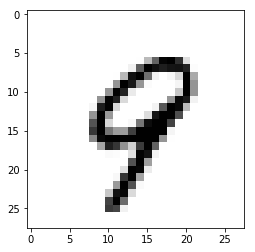

In [34]:
num_sample_images = 10

for x in range(num_sample_images):
    uri = random.choice(list_image_uris)
    img=mpimg.imread(uri)
    imgplot = plt.imshow(img, cmap="Greys")
    plt.show()

# Test GPU Driver

In [35]:
!nvidia-smi

Tue May  9 04:51:16 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 378.13                 Driver Version: 378.13                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 0000:02:00.0      On |                  N/A |
| 30%   39C    P8    11W / 180W |   4799MiB /  8112MiB |      2%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# Build Deep Water MXNet Model

The MXNet backend is the default, so if no backend is explicitly set, MXNet will be used.

In [36]:
from h2o.estimators.deepwater import H2ODeepWaterEstimator
model_mnist_lenet_mx = H2ODeepWaterEstimator(epochs=80, network="lenet")
model_mnist_lenet_mx.train(x=["uri"], y="label",
                           training_frame=mnist_training,
                           validation_frame=mnist_testing,
                           model_id="model_mnist_lenet_mx")

deepwater Model Build progress: |█████████████████████████████████████████| 100%


In [37]:
model_mnist_lenet_mx.show()

Model Details
H2ODeepWaterEstimator :  Deep Water
Model Key:  model_mnist_lenet_mx


ModelMetricsMultinomial: deepwater
** Reported on train data. **

MSE: 2.9238779147804818e-05
RMSE: 0.005407289445535981
LogLoss: 0.00022719911928558199
Mean Per-Class Error: 0.0
Confusion Matrix: vertical: actual; across: predicted



0,1,2,3,4,5,6,7,8,9,Error,Rate
938.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 938
0.0,1103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"0 / 1,103"
0.0,0.0,1026.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"0 / 1,026"
0.0,0.0,0.0,994.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 994
0.0,0.0,0.0,0.0,976.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 976
0.0,0.0,0.0,0.0,0.0,898.0,0.0,0.0,0.0,0.0,0.0,0 / 898
0.0,0.0,0.0,0.0,0.0,0.0,1002.0,0.0,0.0,0.0,0.0,"0 / 1,002"
0.0,0.0,0.0,0.0,0.0,0.0,0.0,1055.0,0.0,0.0,0.0,"0 / 1,055"
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,926.0,0.0,0.0,0 / 926
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1004.0,0.0,"0 / 1,004"


Top-10 Hit Ratios: 


k,hit_ratio
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0
10,1.0



ModelMetricsMultinomial: deepwater
** Reported on validation data. **

MSE: 0.009023165097423982
RMSE: 0.09499034212710249
LogLoss: 0.05017128162863757
Mean Per-Class Error: 0.01078546363714374
Confusion Matrix: vertical: actual; across: predicted



0,1,2,3,4,5,6,7,8,9,Error,Rate
973.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0071429,7 / 980
0.0,1132.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0026432,"3 / 1,135"
0.0,2.0,1022.0,2.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0096899,"10 / 1,032"
0.0,0.0,0.0,1006.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0039604,"4 / 1,010"
0.0,0.0,0.0,0.0,969.0,0.0,2.0,1.0,0.0,10.0,0.0132383,13 / 982
2.0,0.0,0.0,6.0,0.0,879.0,1.0,1.0,2.0,1.0,0.0145740,13 / 892
3.0,4.0,0.0,0.0,3.0,5.0,941.0,0.0,2.0,0.0,0.0177453,17 / 958
0.0,2.0,3.0,0.0,1.0,1.0,0.0,1018.0,1.0,2.0,0.0097276,"10 / 1,028"
3.0,0.0,1.0,1.0,1.0,2.0,0.0,2.0,963.0,1.0,0.0112936,11 / 974
1.0,3.0,1.0,0.0,7.0,3.0,0.0,3.0,0.0,991.0,0.0178394,"18 / 1,009"


Top-10 Hit Ratios: 


k,hit_ratio
1,0.9894
2,0.9988000
3,0.9997
4,0.9998
5,0.9999000
6,1.0
7,1.0
8,1.0
9,1.0
10,1.0


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
,2017-05-09 04:51:16,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan
,2017-05-09 04:51:16,0.951 sec,11130 obs/sec,0.0170667,1,1024.0,0.5083504,2.1276716,0.2816972,0.5052221,2.0969191,0.2767
,2017-05-09 04:51:25,9.022 sec,18467 obs/sec,2.3552,138,141312.0,0.1286586,0.0692300,0.0199557,0.1514920,0.0989359,0.027
,2017-05-09 04:51:30,14.175 sec,18358 obs/sec,3.7717333,221,226304.0,0.0833549,0.0300278,0.0081637,0.1115630,0.0575506,0.0148
,2017-05-09 04:51:35,19.188 sec,18054 obs/sec,5.0858667,298,305152.0,0.0666445,0.0175441,0.0047369,0.1106728,0.0569475,0.0143
,2017-05-09 04:51:40,24.297 sec,17637 obs/sec,6.3317333,371,379904.0,0.0562053,0.0120473,0.0039307,0.1071403,0.0646352,0.0131
,2017-05-09 04:51:45,29.392 sec,17427 obs/sec,7.5946667,445,455680.0,0.0254586,0.0023757,0.0010079,0.1008606,0.0519758,0.0123
,2017-05-09 04:51:50,34.493 sec,17258 obs/sec,8.8405333,518,530432.0,0.0219109,0.0019636,0.0005039,0.1000205,0.0536413,0.0113
,2017-05-09 04:51:55,39.695 sec,17138 obs/sec,10.1034667,592,606208.0,0.0117912,0.0006531,0.0001008,0.0966056,0.0507177,0.0111
,2017-05-09 04:52:01,45.341 sec,17088 obs/sec,11.5370667,676,692224.0,0.0054073,0.0002272,0.0,0.0949903,0.0501713,0.0106


# Build Deep Water TensorFlow Model

In [38]:
model_mnist_lenet_tf = H2ODeepWaterEstimator(epochs=80, network="lenet", backend="tensorflow")
model_mnist_lenet_tf.train(x=["uri"], y="label",
                           training_frame=mnist_training,
                           validation_frame=mnist_testing,
                           model_id="model_mnist_lenet_tf")

deepwater Model Build progress: |█████████████████████████████████████████| 100%


In [39]:
model_mnist_lenet_tf.show()

Model Details
H2ODeepWaterEstimator :  Deep Water
Model Key:  model_mnist_lenet_tf


ModelMetricsMultinomial: deepwater
** Reported on train data. **

MSE: 0.008807465506858264
RMSE: 0.09384809804603535
LogLoss: 0.03852629216180632
Mean Per-Class Error: 0.010554580973143171
Confusion Matrix: vertical: actual; across: predicted



0,1,2,3,4,5,6,7,8,9,Error,Rate
991.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0040201,4 / 995
3.0,1108.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0053860,"6 / 1,114"
1.0,3.0,991.0,5.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0129482,"13 / 1,004"
0.0,0.0,2.0,1008.0,0.0,3.0,0.0,2.0,4.0,1.0,0.0117647,"12 / 1,020"
0.0,0.0,0.0,0.0,966.0,0.0,0.0,1.0,0.0,10.0,0.0112590,11 / 977
1.0,0.0,0.0,1.0,0.0,894.0,1.0,0.0,1.0,0.0,0.0044543,4 / 898
0.0,0.0,0.0,0.0,0.0,4.0,1023.0,0.0,1.0,0.0,0.0048638,"5 / 1,028"
0.0,3.0,1.0,1.0,2.0,0.0,0.0,1015.0,0.0,18.0,0.0240385,"25 / 1,040"
2.0,1.0,0.0,1.0,1.0,7.0,5.0,0.0,947.0,3.0,0.0206825,20 / 967
0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,973.0,0.0061287,6 / 979


Top-10 Hit Ratios: 


k,hit_ratio
1,0.9894233
2,0.9982039
3,0.9997007
4,0.9999002
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0
10,1.0



ModelMetricsMultinomial: deepwater
** Reported on validation data. **

MSE: 0.017004871022782454
RMSE: 0.13040272628585053
LogLoss: 0.08582499693605794
Mean Per-Class Error: 0.018464224835674437
Confusion Matrix: vertical: actual; across: predicted



0,1,2,3,4,5,6,7,8,9,Error,Rate
971.0,0.0,3.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0091837,9 / 980
4.0,1126.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0079295,"9 / 1,135"
1.0,2.0,1020.0,3.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0116279,"12 / 1,032"
0.0,0.0,2.0,993.0,0.0,6.0,0.0,3.0,5.0,1.0,0.0168317,"17 / 1,010"
0.0,1.0,2.0,0.0,966.0,0.0,3.0,0.0,1.0,9.0,0.0162933,16 / 982
1.0,0.0,0.0,6.0,0.0,881.0,3.0,0.0,0.0,1.0,0.0123318,11 / 892
3.0,3.0,1.0,0.0,1.0,9.0,938.0,0.0,3.0,0.0,0.0208768,20 / 958
0.0,1.0,6.0,5.0,6.0,0.0,1.0,986.0,1.0,22.0,0.0408560,"42 / 1,028"
7.0,0.0,4.0,3.0,0.0,11.0,5.0,1.0,942.0,1.0,0.0328542,32 / 974
0.0,2.0,1.0,2.0,6.0,3.0,0.0,1.0,1.0,993.0,0.0158573,"16 / 1,009"


Top-10 Hit Ratios: 


k,hit_ratio
1,0.9816
2,0.995
3,0.9986
4,0.999
5,0.9996
6,0.9997
7,0.9998
8,0.9998
9,0.9999000
10,1.0


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
,2017-05-09 04:52:44,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan
,2017-05-09 04:52:44,1.278 sec,6872 obs/sec,0.0170667,1,1024.0,0.6147181,1.1529294,0.3878467,0.6051395,1.1116795,0.377
,2017-05-09 04:52:54,11.062 sec,11805 obs/sec,1.8090667,106,108544.0,0.1552974,0.1091712,0.0285372,0.1730931,0.1352584,0.0352
,2017-05-09 04:53:01,18.577 sec,11637 obs/sec,3.0890667,181,185344.0,0.1246167,0.0618644,0.0183596,0.1434925,0.0871844,0.0239
,2017-05-09 04:53:09,26.437 sec,11490 obs/sec,4.4032,258,264192.0,0.1246678,0.0744521,0.0184594,0.1465197,0.1089135,0.025
,2017-05-09 04:53:17,34.419 sec,11314 obs/sec,5.7002667,334,342016.0,0.1062530,0.0479331,0.0141688,0.1341741,0.0950406,0.0209
,2017-05-09 04:53:25,42.065 sec,11151 obs/sec,6.8778667,403,412672.0,0.0938481,0.0385263,0.0105767,0.1304027,0.0858250,0.0184
,2017-05-09 04:53:33,50.665 sec,11003 obs/sec,8.2261333,482,493568.0,0.0925869,0.0449182,0.0096787,0.1340598,0.1162025,0.0202
,2017-05-09 04:53:41,58.188 sec,10888 obs/sec,9.3696,549,562176.0,0.0890942,0.0356157,0.0095789,0.1383489,0.1333587,0.0215
,2017-05-09 04:53:48,1 min 5.805 sec,10829 obs/sec,10.5472,618,632832.0,0.0605894,0.0192707,0.0045899,0.1189931,0.1052881,0.0159


# Build Deep Water Caffe Model

In [40]:
model_mnist_lenet_caffe = H2ODeepWaterEstimator(epochs=80, network="lenet", backend="caffe")
model_mnist_lenet_caffe.train(x=["uri"], y="label",
                           training_frame=mnist_training,
                           validation_frame=mnist_testing,
                           model_id="model_mnist_lenet_caffe")

deepwater Model Build progress: |█████████████████████████████████████████| 100%


In [41]:
model_mnist_lenet_caffe.show()

Model Details
H2ODeepWaterEstimator :  Deep Water
Model Key:  model_mnist_lenet_caffe


ModelMetricsMultinomial: deepwater
** Reported on train data. **

MSE: 0.8095571993929722
RMSE: 0.8997539660334776
LogLoss: 2.301585012019263
Mean Per-Class Error: 0.9
Confusion Matrix: vertical: actual; across: predicted



0,1,2,3,4,5,6,7,8,9,Error,Rate
0.0,984.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,984 / 984
0.0,1120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"0 / 1,120"
0.0,1020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"1,020 / 1,020"
0.0,1034.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"1,034 / 1,034"
0.0,997.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,997 / 997
0.0,897.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,897 / 897
0.0,990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,990 / 990
0.0,1047.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"1,047 / 1,047"
0.0,995.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,995 / 995
0.0,985.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,985 / 985


Top-10 Hit Ratios: 


k,hit_ratio
1,0.1112325
2,0.2139239
3,0.3129407
4,0.4169232
5,0.5147482
6,0.6124739
7,0.711292
8,0.8125930
9,0.9109146
10,0.9999999



ModelMetricsMultinomial: deepwater
** Reported on validation data. **

MSE: 0.8095325554508053
RMSE: 0.899740271106504
LogLoss: 2.3014509464429227
Mean Per-Class Error: 0.9
Confusion Matrix: vertical: actual; across: predicted



0,1,2,3,4,5,6,7,8,9,Error,Rate
0.0,980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,980 / 980
0.0,1135.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"0 / 1,135"
0.0,1032.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"1,032 / 1,032"
0.0,1010.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"1,010 / 1,010"
0.0,982.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,982 / 982
0.0,892.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,892 / 892
0.0,958.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,958 / 958
0.0,1028.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"1,028 / 1,028"
0.0,974.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,974 / 974
0.0,1009.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"1,009 / 1,009"


Top-10 Hit Ratios: 


k,hit_ratio
1,0.1135
2,0.2145000
3,0.3127
4,0.4155
5,0.5164
6,0.6144000
7,0.7118
8,0.815
9,0.9108
10,1.0


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
,2017-05-09 04:54:16,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan
,2017-05-09 04:54:16,4.941 sec,3518 obs/sec,0.0170667,1,1024.0,0.8668129,24.1941831,0.7544940,0.8608721,23.8999989,0.744
,2017-05-09 04:54:49,38.188 sec,3889 obs/sec,1.9456,114,116736.0,0.8996859,2.3044751,0.8887675,0.8995699,2.3033484,0.8865
,2017-05-09 04:55:25,1 min 13.475 sec,3679 obs/sec,3.7888,222,227328.0,0.8998119,2.3063774,0.8960175,0.8999011,2.3072931,0.8972
,2017-05-09 04:56:00,1 min 49.227 sec,3626 obs/sec,5.6661333,332,339968.0,0.8998142,2.3035552,0.9021750,0.8997164,2.3025943,0.8991
,2017-05-09 04:56:38,2 min 26.886 sec,3597 obs/sec,7.6629333,449,459776.0,0.8997377,2.3031960,0.9011818,0.8997106,2.3029205,0.9026
,2017-05-09 04:57:14,3 min 3.275 sec,3578 obs/sec,9.5744,561,574464.0,0.8997930,2.3031519,0.8887675,0.8997469,2.3027048,0.8865
,2017-05-09 04:57:51,3 min 40.322 sec,3560 obs/sec,11.5029333,674,690176.0,0.8996081,2.3037517,0.8887675,0.8995709,2.3034134,0.8865
,2017-05-09 04:58:29,4 min 17.371 sec,3557 obs/sec,13.4826667,790,808960.0,0.8997540,2.3015850,0.8887675,0.8997403,2.3014509,0.8865
,2017-05-09 04:59:04,4 min 52.820 sec,3567 obs/sec,15.4112,903,924672.0,0.8999979,2.3047100,0.9011818,0.9000687,2.3054582,0.9026


# Save H2O Models

In [42]:
h2o.save_model(model=model_mnist_lenet_mx, path=project_path+"/models/", force=True)
h2o.save_model(model=model_mnist_lenet_tf, path=project_path+"/models/", force=True)
h2o.save_model(model=model_mnist_lenet_caffe, path=project_path+"/models/", force=True)

'/gtc-2017/models/model_mnist_lenet_caffe'

# Export MOJOs for Deployment

In [43]:
model_mnist_lenet_mx.download_mojo(path=project_path+"/models/", get_genmodel_jar=True)
model_mnist_lenet_tf.download_mojo(path=project_path+"/models/", get_genmodel_jar=True)
model_mnist_lenet_caffe.download_mojo(path=project_path+"/models/", get_genmodel_jar=True)

'/gtc-2017/models/model_mnist_lenet_caffe.zip'